# Raster data with Rasterio

## Reading raster data

In [1]:
# this cell contains our library imports
import pandas as pd
import altair as alt
import geopandas as geopandas
import contextily as cx
import folium as folium
from pysal.viz import mapclassify
from libpysal import weights
from splot.libpysal import plot_spatial_weights
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import esda as esda
import rasterio as rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats


alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
uhi = rasterio.open('tas_Brussels_UrbClim_2017_08_v1.0_week.tif')

In [3]:
array_list = []
for i in range(24):
    array_list.append(uhi.read(i + 1))

In [4]:
min_temp = np.min(array_list, axis=0)

In [5]:
data = pd.read_csv('brussels-data-export.csv', sep = ';', decimal = ',')
data = data.query('fiscal_income > 0')
districts = geopandas.read_file('URBIS_ADM_MD/UrbAdm_MONITORING_DISTRICT.shp')
districts_joined = districts.merge(data, left_on = 'ID', right_on = 'code')

In [6]:
districts_joined = districts_joined.to_crs("EPSG:3035")

In [7]:
district_temp = zonal_stats(districts_joined, min_temp, affine = uhi.transform)

In [8]:
mean_temps = []
for district in district_temp:
    mean_temps.append(district['mean'])

In [9]:
mean_temps

[291.5115183954654,
 291.62086508930594,
 291.5639977088341,
 291.49323078230316,
 291.27072931925454,
 291.5351626747533,
 291.0749135335287,
 291.13787367430376,
 290.658599640106,
 290.700634765625,
 290.55001294481883,
 290.7570271809896,
 290.32928285144624,
 290.0563466689166,
 291.20543799462257,
 291.1441512689358,
 290.88261148203975,
 291.7393005371094,
 291.3040483582695,
 292.1649361746652,
 291.568004023078,
 291.9853732086891,
 291.74776865641275,
 292.4505848131682,
 291.3663592422218,
 291.8647443498884,
 291.8045130600164,
 291.7390721097906,
 291.3381190224299,
 291.7593231201172,
 291.6662410481771,
 292.637979206286,
 292.5794520522609,
 292.4748514416148,
 292.44913208007813,
 292.6409484863281,
 292.66775851779516,
 292.4992515927269,
 292.70647571705007,
 292.3335277278249,
 292.48115485055104,
 292.1082103216826,
 292.385804494222,
 292.7257144066595,
 292.5691026475694,
 292.353410436752,
 292.7226366315569,
 292.16885079277887,
 292.54988461449034,
 292.343282

In [10]:
districts_joined['mean_temp'] = mean_temps

<AxesSubplot:>

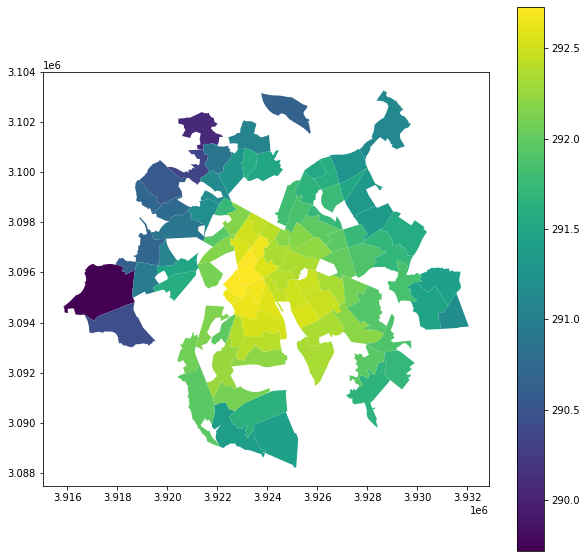

In [11]:
districts_joined.plot(column = 'mean_temp', figsize = [10, 10], legend = True)

<AxesSubplot:>

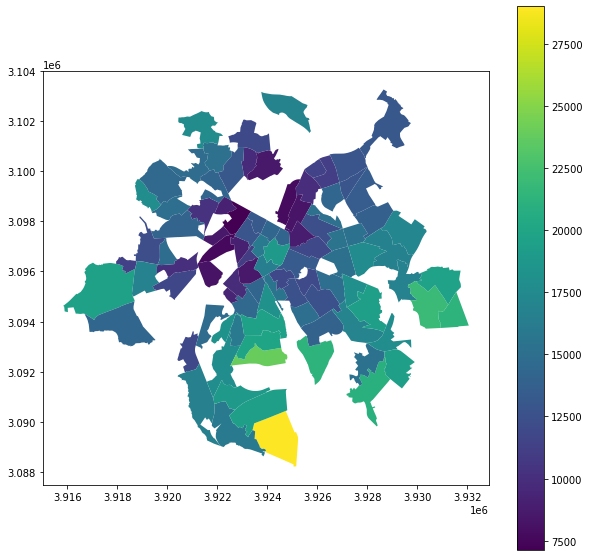

In [12]:
districts_joined.plot(column = 'fiscal_income', figsize = [10, 10], legend = True)

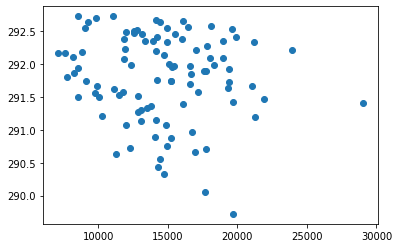

In [13]:
plt.scatter(districts_joined['fiscal_income'], districts_joined['mean_temp'])

In [14]:
districts_joined['fiscal_income'].corr(districts_joined['mean_temp'])

-0.12986727957109923

In [15]:
hourly_mean = []
for i in range(24):
    hourly_mean.append(np.mean(uhi.read(i + 1)))

In [16]:
hourly_mean

[292.48245,
 292.04922,
 291.39532,
 290.72873,
 290.16113,
 290.0175,
 290.48248,
 291.3059,
 292.24655,
 293.0762,
 294.18134,
 295.23254,
 295.35895,
 295.1647,
 295.30402,
 295.79376,
 295.9885,
 295.90555,
 295.49277,
 294.6296,
 293.63565,
 292.89743,
 292.61926,
 292.43982]

In [17]:
hourly_data = pd.DataFrame()

In [18]:
hourly_data['hour'] = range(24)
hourly_data['mean_temp'] = hourly_mean

In [19]:
hourly_data

,hour,mean_temp
0,0,292.482452
1,1,292.049225
2,2,291.395325
3,3,290.728729
4,4,290.161133
5,5,290.017487
6,6,290.482483
7,7,291.305908
8,8,292.246552
9,9,293.076202


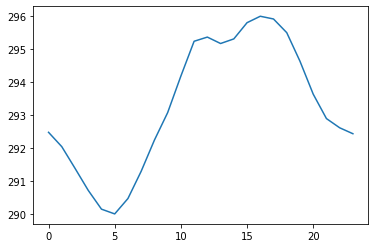

In [20]:
plt.plot(hourly_data['hour'], hourly_data['mean_temp'])